In [1]:
# Check data types

import pandas as pd

df = pd.read_csv('datasets\pet_supplies_2212.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [2]:
# Convert price type to float

df["price"] = pd.to_numeric(df["price"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1350 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


In [3]:
# Check missing values

df.isna().any()

product_id         False
category           False
animal             False
size               False
price               True
sales              False
rating              True
repeat_purchase    False
dtype: bool

In [4]:
# Fill missing values

df["rating"].fillna(0, inplace=True)
df["price"].fillna(df["price"].median(), inplace=True)
df.isna().any()

product_id         False
category           False
animal             False
size               False
price              False
sales              False
rating             False
repeat_purchase    False
dtype: bool

In [5]:
# Check category values

category = df["category"].drop_duplicates()
print(category)

0          Food
1       Housing
3      Medicine
7          Toys
8     Equipment
14    Accessory
22            -
Name: category, dtype: object


In [6]:
# Replace missing values

df["category"] = df["category"].replace(to_replace=r' *- *', value='Unknown', regex=True)
category = df["category"].drop_duplicates()
print(category)

0          Food
1       Housing
3      Medicine
7          Toys
8     Equipment
14    Accessory
22      Unknown
Name: category, dtype: object


In [7]:
# Check animal values

animal = df["animal"].drop_duplicates()
print(animal)

0    Bird
2     Dog
3     Cat
8    Fish
Name: animal, dtype: object


In [8]:
# Check size values

size = df["size"].drop_duplicates()
print(size)

0      large
1     MEDIUM
2     medium
3      small
4      Small
10     Large
31     SMALL
35    Medium
62     LARGE
Name: size, dtype: object


In [9]:
# Standartize values

df["size"] = df["size"].str.capitalize()
size = df["size"].drop_duplicates()
print(size)

0     Large
1    Medium
3     Small
Name: size, dtype: object


   repeat_purchase  count
0                0    594
1                1    906


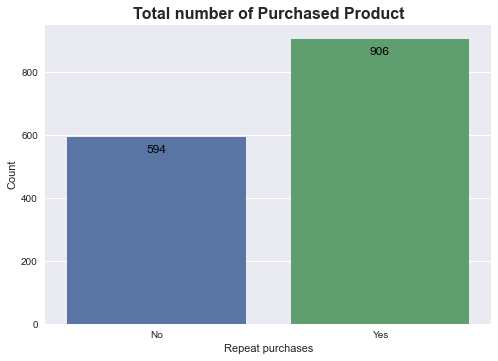

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

df['count'] = 1
purchase = df.groupby("repeat_purchase")['count'].count().reset_index()
print(purchase)

fg = sns.barplot(x='repeat_purchase', y='count', data=purchase)

fg.set_xticklabels(['No', 'Yes'])
fg.text(0, purchase['count'][0]-50, purchase['count'][0], color='black', ha='center', fontsize=12)
fg.text(1, purchase['count'][1]-50, purchase['count'][1], color='black', ha='center', fontsize=12)

fg.set_xlabel('Repeat purchases')
fg.set_ylabel('Count')
fg.set_title('Total number of Purchased Product', fontsize=16, fontweight="bold")

plt.show()

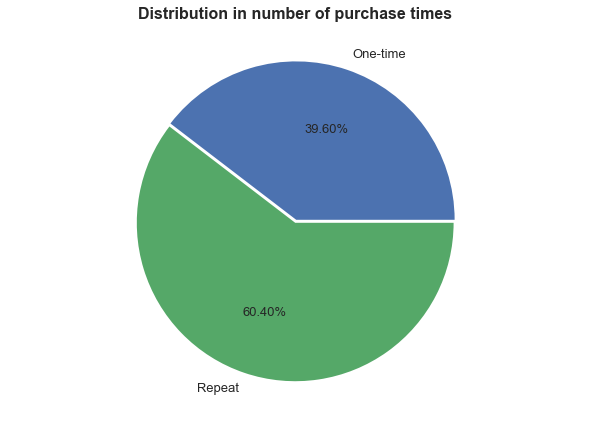

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
repeat = ['One-time', 'Repeat']
count = purchase['count']

explode = (0.02, 0) 
ax.pie(count, labels = repeat, explode=explode, autopct='%1.2f%%', textprops={'fontsize': 13})
plt.title('Distribution in number of purchase times', fontsize=16, fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Repeat purchased products from the total by category')

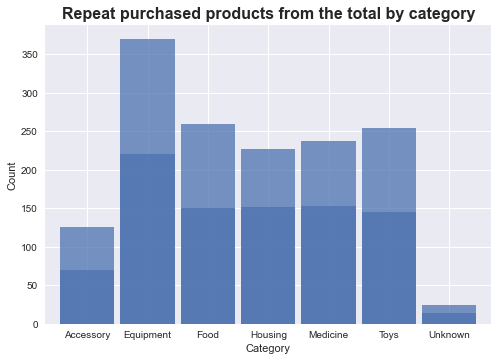

In [12]:
repeat_by_category = df.groupby("category")["repeat_purchase"].sum()
repeat_by_category.plot.bar(rot=0, width=0.9, alpha=0.75)

total_by_category = df.groupby("category")["repeat_purchase"].count()
total_by_category.plot.bar(rot=0, width=0.9, alpha=0.75)

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Repeat purchased products from the total by category", fontsize=16, fontweight="bold")

      repeat_purchase    sales
749                 0   958.44
1167                0   534.41
551                 0   548.11
553                 0   705.93
554                 0  1070.85
...               ...      ...
612                 1  1084.15
611                 1  1207.50
610                 1   885.53
617                 1   778.16
1499                1   826.08

[1500 rows x 2 columns]


Text(0.5, 1.0, 'Range in number of sales for single and repeat purchases')

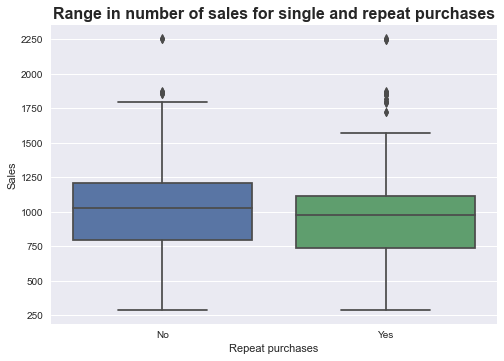

In [13]:
sales = df[['repeat_purchase', 'sales']].sort_values('repeat_purchase')
print(sales)

fg = sns.boxplot(x='repeat_purchase', y='sales', data=sales)

fg.set_xticklabels(['No', 'Yes'])

fg.set_xlabel('Repeat purchases')
fg.set_ylabel('Sales')
fg.set_title('Range in number of sales for single and repeat purchases', fontsize=16, fontweight='bold')

In [14]:
sales_mean = sales.groupby('repeat_purchase')['sales'].mean()
print(sales_mean)

repeat_purchase
0    1028.368013
1     975.768400
Name: sales, dtype: float64


In [15]:
sales = df[df['repeat_purchase'] == 1]
sales_r = sales.groupby('category')['sales'].sum().reset_index()
sales_r['Purchase'] = 'Repeat'
print(sales_r)

    category      sales Purchase
0  Accessory   63399.72   Repeat
1  Equipment  205413.27   Repeat
2       Food  166821.05   Repeat
3    Housing  118031.21   Repeat
4   Medicine  134637.06   Repeat
5       Toys  180031.75   Repeat
6    Unknown   15712.11   Repeat


In [16]:
sales = df[df['repeat_purchase'] == 0]
sales_s = sales.groupby('category')['sales'].sum().reset_index()
sales_s['Purchase'] = 'One-time'
print(sales_s)

    category      sales  Purchase
0  Accessory   57873.72  One-time
1  Equipment  143461.97  One-time
2       Food  120317.11  One-time
3    Housing   57299.10  One-time
4   Medicine   79429.19  One-time
5       Toys  139865.35  One-time
6    Unknown   12604.16  One-time


    category      sales  Purchase
0  Accessory   57873.72  One-time
1  Equipment  143461.97  One-time
2       Food  120317.11  One-time
3    Housing   57299.10  One-time
4   Medicine   79429.19  One-time
5       Toys  139865.35  One-time
6    Unknown   12604.16  One-time
0  Accessory   63399.72    Repeat
1  Equipment  205413.27    Repeat
2       Food  166821.05    Repeat
3    Housing  118031.21    Repeat
4   Medicine  134637.06    Repeat
5       Toys  180031.75    Repeat
6    Unknown   15712.11    Repeat


Text(0.5, 1.0, 'Total sales by single and repeat purchases')

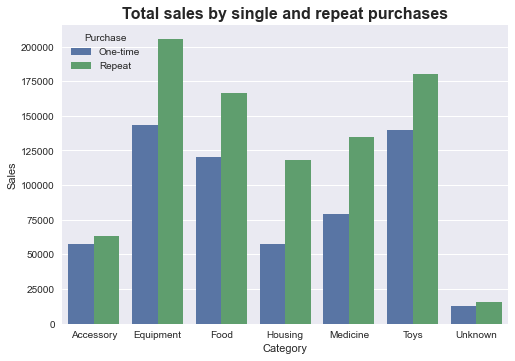

In [17]:
sales_res = pd.concat([sales_s, sales_r])
print(sales_res)

fg = sns.barplot(data=sales_res, x='category', y='sales', hue='Purchase')

fg.set_xlabel('Category')
fg.set_ylabel('Sales')
fg.set_title('Total sales by single and repeat purchases', fontsize=16, fontweight='bold')